In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/

/content/drive


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
!pip install tweet-preprocessor

In [ ]:
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import preprocessor as p
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from string import punctuation
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import STOPWORDS
from textblob import TextBlob

def preprocess(text):
  text=text.lower()
  text = word_tokenize(text)
  text = ' '.join([c for c in text if c not in punctuation])
  Words = text.split()
  Words = [word for word in Words if word not in STOPWORDS and "'" not in word]
  Words=" ".join([c for c in Words if sum(TextBlob(c).sentiment)!=0])
  # Words=" ".join(w for w in nltk.wordpunct_tokenize(Words) if w.lower() in words or not w.isalpha())
  return Words
preprocess("Y'all dumb!! Nigga you dumb as fuck! Yeah I Kno, I've been knowing these Mann you gotta stop repeating it.")

'dumb dumb fuck'

In [ ]:
from nltk.stem import PorterStemmer
ps =PorterStemmer()

def stringtolist(text,parameters):
  text=text.lower()
  text = word_tokenize(text)
  text = ' '.join([c for c in text if c not in punctuation])
  Words = text.split()
  root_sent = ""
  for w in Words:
    rootWord=ps.stem(w)
    root_sent += " "
    root_sent += rootWord
  Words = rootWord.split()
  Words = [word for word in Words if word not in STOPWORDS and "'" not in word]
  Words=" ".join([c for c in Words if sum(TextBlob(c).sentiment)!=0])
  text = text.split(" ")
  l = []
  for j in range(len(parameters)):
    if parameters[j] in text:
      l.append(1)
    else:
      l.append(0)
  return l

In [ ]:
# from textblob import TextBlob
# s1="You are fucking nigga beautifull hdsafuihf zfaf is."
# s2=TextBlob("fucking sexy").sentiment
# print(sum(s2))

In [ ]:
from nltk.stem import PorterStemmer
ps =PorterStemmer()
def root_sentence(text):
  text = text.split(' ')

  root_sent = ""
  for w in text:
    rootWord=ps.stem(w)
    root_sent += " "
    root_sent += rootWord

  return root_sent

Streaming output truncated to the last 5000 lines.
{'tweet_url': 'https://twitter.com/user/status/1063036754410831872', 'labels': [2, 0, 0], 'img_url': 'http://pbs.twimg.com/media/DsCqSkbWsAAAiTt.jpg', 'tweet_text': '16 years of working here and this bed is still an absolute twat to make 😆 https://t.co/fboxb0gLyk', 'labels_str': ['Sexist', 'NotHate', 'NotHate']}
{'img_url': 'http://pbs.twimg.com/media/D2H0JzqX4AAuqiV.jpg', 'labels': [1, 0, 0], 'tweet_url': 'https://twitter.com/user/status/1108435438098935809', 'tweet_text': 'Nigga teeth shaped just like this https://t.co/RNYkW6jZhB', 'labels_str': ['Racist', 'NotHate', 'NotHate']}
{'tweet_url': 'https://twitter.com/user/status/1045820434044866560', 'labels': [0, 0, 0], 'img_url': 'http://pbs.twimg.com/tweet_video_thumb/DoOAIZWXsAEbO_h.jpg', 'tweet_text': '@Grzabjj Pointing out conspiracy theories makes you a conspiracy theorist? https://t.co/mPvxDJMehB', 'labels_str': ['NotHate', 'NotHate', 'NotHate']}
{'tweet_url': 'https://twitter.co

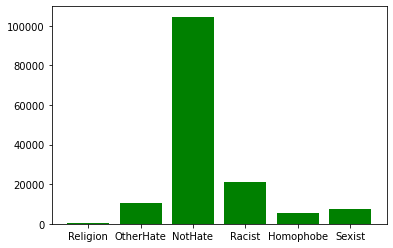

{'Racist': 21318, 'OtherHate': 10490, 'NotHate': 103527, 'Homophobe': 5715, 'Sexist': 7754, 'Religion': 1015}


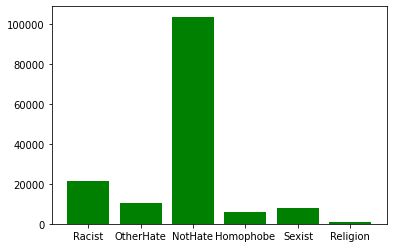

{'Homophobe': 5717, 'OtherHate': 10404, 'NotHate': 103878, 'Racist': 21305, 'Sexist': 7503, 'Religion': 982}


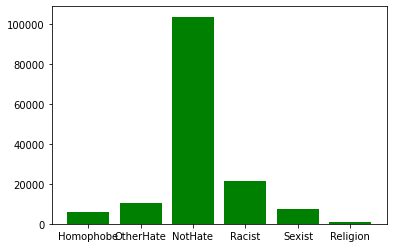

In [ ]:
f = open('hate.json',) 

def freq(dic,ind): #function to plot distribution of type of tweets
  labels={}
  for i in dic:
      try:
        v=dic[i][1][ind]
      except:
        continue
      if v in labels:
        labels[v]+=1
      else:
        labels[v]=1
  print(labels)
  x=[]
  y=[]
  for i in labels:
    x.append(i)
    y.append(labels[i])
  plt.bar(x, y, color='g')
  plt.show()
# returns JSON object as  
# a dictionary 
data = json.load(f) 
  
# Iterating through the json 
# list
c=0
dic={}
print(len(data))
s = ""
for i in data:
    di=data[i]
    dic[i]=[di['tweet_text'],di['labels_str']]
    ss = p.clean(di['tweet_text'])
    ss=preprocess(ss)
    ss = root_sentence(ss)
    s += " "+ss
    print(data[i]);

print(len(dic))
print(len(s))


freq(dic,0) 
freq(dic,1)
freq(dic,2)

  
# Closing file 
f.close() 

In [ ]:
c=0
for i in data:
  print(data[i])
  c+=1
  if(c==50):
    break

{'img_url': 'http://pbs.twimg.com/tweet_video_thumb/D3gi9MHWAAAgfl7.jpg', 'labels': [4, 1, 3], 'tweet_url': 'https://twitter.com/user/status/1114679353714016256', 'tweet_text': '@FriskDontMiss Nigga https://t.co/cAsaLWEpue', 'labels_str': ['Religion', 'Racist', 'Homophobe']}
{'tweet_url': 'https://twitter.com/user/status/1063020048816660480', 'labels': [5, 5, 5], 'img_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1063019643709747200/pu/img/wK5HgoX6tFfxWJmi.jpg', 'tweet_text': 'My horses are retarded https://t.co/HYhqc6d5WN', 'labels_str': ['OtherHate', 'OtherHate', 'OtherHate']}
{'img_url': 'http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg', 'labels': [0, 0, 0], 'tweet_url': 'https://twitter.com/user/status/1108927368075374593', 'tweet_text': '“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL SHIT NIGGA” https://t.co/UczofqHrLq', 'labels_str': ['NotHate', 'NotHate', 'NotHate']}
{'img_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1114018095348084738/pu/img/m6oP5fBm2RCcq5Wn.jpg', 'labels': [1

In [ ]:
print(s[:1000])

      real shit      real fuck  fuck                      wan            fuck  favorit  cocki bad        definit          fuck      fuck littl  dumb    littl    cocki      happi big love        retard            new love    human  fuck retard wonder  love        love        happi  big right      slow    good  right  retard  strang    proud proud  wan      real start    lmao      wan      rich fuck  retard  enjoy  thank  free    good  right      big  shit  free  expect hard    real        sad  late best  proud  shit hard        shit  wan bad  stupid              ok retard  young          drag    littl  tire  better lmao    good      fuck retard  love          right      free  suddenli  fuck        raw    guilti possibl  funni shit  interest    littl    fuck    heavi easi    better    quick  live  right right    complet  lmao          best      wrong      real quick    enjoy  ugli    silent    solid    secur      soft  innoc accur  fun  quick  shit lol      black sweet  funni      hate  

In [ ]:
s = s.split(' ')
s1 = []
for p in s:
  if p!='':
    s1.append(p)

In [ ]:
s1

['real',
 'shit',
 'real',
 'fuck',
 'fuck',
 'wan',
 'fuck',
 'favorit',
 'cocki',
 'bad',
 'definit',
 'fuck',
 'fuck',
 'littl',
 'dumb',
 'littl',
 'cocki',
 'happi',
 'big',
 'love',
 'retard',
 'new',
 'love',
 'human',
 'fuck',
 'retard',
 'wonder',
 'love',
 'love',
 'happi',
 'big',
 'right',
 'slow',
 'good',
 'right',
 'retard',
 'strang',
 'proud',
 'proud',
 'wan',
 'real',
 'start',
 'lmao',
 'wan',
 'rich',
 'fuck',
 'retard',
 'enjoy',
 'thank',
 'free',
 'good',
 'right',
 'big',
 'shit',
 'free',
 'expect',
 'hard',
 'real',
 'sad',
 'late',
 'best',
 'proud',
 'shit',
 'hard',
 'shit',
 'wan',
 'bad',
 'stupid',
 'ok',
 'retard',
 'young',
 'drag',
 'littl',
 'tire',
 'better',
 'lmao',
 'good',
 'fuck',
 'retard',
 'love',
 'right',
 'free',
 'suddenli',
 'fuck',
 'raw',
 'guilti',
 'possibl',
 'funni',
 'shit',
 'interest',
 'littl',
 'fuck',
 'heavi',
 'easi',
 'better',
 'quick',
 'live',
 'right',
 'right',
 'complet',
 'lmao',
 'best',
 'wrong',
 'real',
 'quic

In [ ]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(s1)
# summarize

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
content_freq=sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1], reverse= True)

In [ ]:
# content_freq = content_freq[:2000]

In [ ]:
print(len(content_freq))

988


In [ ]:
parameters = []
for i in range(len(content_freq)):
  parameters.append(content_freq[i][0])

parameters.append('nigga')


In [ ]:
parameters

['young',
 'yarn',
 'wtf',
 'wrongli',
 'wrong',
 'wow',
 'worthless',
 'worthi',
 'worth',
 'wors',
 'wonder',
 'witti',
 'wise',
 'win',
 'willingly',
 'willingli',
 'will',
 'wild',
 'wide',
 'wet',
 'welcom',
 'weirdli',
 'weird',
 'wealthi',
 'weak',
 'waste',
 'wast',
 'warm',
 'wari',
 'want',
 'wan',
 'wacki',
 'vulgar',
 'vital',
 'violent',
 'victim',
 'vast',
 'vacuum',
 'utterli',
 'utter',
 'useless',
 'use',
 'unusu',
 'unthink',
 'unread',
 'unorigin',
 'unnecessarili',
 'unnecessari',
 'unknown',
 'uniqu',
 'unimport',
 'unhealthi',
 'unhappi',
 'unfortun',
 'unforgett',
 'unfaith',
 'unfairli',
 'unfair',
 'unexpectedli',
 'unexpect',
 'uncut',
 'uncomfortable',
 'uncomfort',
 'uncivil',
 'unbeliev',
 'unaware',
 'unawar',
 'unasham',
 'unansw',
 'ultim',
 'ugli',
 'typic',
 'twist',
 'truth',
 'trueli',
 'true',
 'troubl',
 'tri',
 'trendi',
 'tremend',
 'trap',
 'tradit',
 'tough',
 'touch',
 'total',
 'toilet',
 'tired',
 'tire',
 'tiny',
 'tini',
 'tightli',
 'tigh

In [ ]:
len(parameters)

989

In [ ]:
print(len(data))

149823


In [ ]:
X = []
Y = []

import pandas as pd
# df = pd.DataFrame(columns = parameters)         # Dataframe , 998 attributes every row, stem word 1 otherwise 0

# idx = 0
for i in data:
  # row = [0 for i in range(989)]
  # df.append(row, ignore_index=True)
  ss = data[i]['tweet_text']
  l=stringtolist(ss,parameters)
  X.append(l)
  Y.append(data[i]['labels'][0])
  if(data[i]['labels'][0]>0):
    X.append(l)
    Y.append(data[i]['labels'][0])
  if(data[i]['labels'][0]==4):
    X.append(l)
    Y.append(data[i]['labels'][0])

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(X,Y,test_size=0.3, random_state=1)

In [ ]:
import pickle
naive_base = MultinomialNB()
naive_base.fit(x_tr, y_tr)
filename = 'nb_model.sav'
pickle.dump(naive_base, open(filename, 'wb'))

In [ ]:
print(naive_base.score(x_te, y_te))

0.5387577089509012


In [ ]:
nb_predictions=naive_base.predict(x_te)
print(classification_report(y_te,nb_predictions))

              precision    recall  f1-score   support

           0       0.54      0.96      0.69     31299
           1       0.31      0.00      0.01     12571
           2       0.37      0.05      0.09      4444
           3       0.39      0.05      0.09      3331
           4       0.00      0.00      0.00       583
           5       0.50      0.18      0.26      6470

    accuracy                           0.54     58698
   macro avg       0.35      0.21      0.19     58698
weighted avg       0.46      0.54      0.41     58698



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap = True, n_estimators = 100,n_jobs = -1)
rf.fit(x_tr, y_tr)
filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))
predictions = rf.predict(x_te)

In [ ]:
print(sum(predictions))

18757


In [ ]:
print(rf.score(x_te, y_te))

0.5589117176053698


In [ ]:
print(classification_report(y_te,predictions))

              precision    recall  f1-score   support

           0       0.56      0.94      0.70     31299
           1       0.57      0.08      0.14     12571
           2       0.53      0.11      0.19      4444
           3       0.54      0.11      0.18      3331
           4       0.64      0.10      0.18       583
           5       0.57      0.22      0.32      6470

    accuracy                           0.56     58698
   macro avg       0.57      0.26      0.29     58698
weighted avg       0.56      0.56      0.47     58698



In [ ]:
# filename = 'rf_model.sav'
# pickle.dump(rf, open(filename, 'wb'))

In [ ]:
# parameters={'kernel':('linear','rbf','poly'),'C':[.001,.01,.86,.96,1,5,10,20,30,35,40,50,55,100]}
# rs=GridSearchCV(estimator=svm.SVC(),param_grid=parameters,cv=3)
# rs.fit(x_tr,y_tr)

In [ ]:
# best_kernel=rs.best_params_['kernel']
# best_c=rs.best_params_['C']
# print(rs.best_score_)
# print(rs.best_params_)

In [ ]:
# model=svm.SVC()
# model.fit(x_tr,y_tr)
# filename = 'svm_model.sav'
# pickle.dump(model, open(filename, 'wb'))
# pred=model.predict(x_te)

In [ ]:
# print(accuracy_score(y_te,pred))

In [ ]:
# from sklearn.neural_network import MLPClassifier
# mlp= MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
# mlp.fit(x_tr,y_tr)
# print(mlp.score(x_te, y_te))

In [ ]:
# s="muslims have a right to be angry and to kill millions of french people for the massacres of the past"

In [ ]:
# s=""
# l=stringtolist(s,parameters)

# y1= rf.predict([l])
# print(y1)


In [ ]:
# import pickle
# with open('parameters.pickle', 'wb') as write:
#     pickle.dump(parameters, write, protocol=pickle.HIGHEST_PROTOCOL) 